## **Linear Regression principle**

Linear regression is a **supervised learning algorithm** used when target / dependent variable continues real number. It establishes relationship between dependent variable  y  and one or more independent variable  x  using best fit line. It work on the **principle of ordinary least square  (OLS)  / Mean square errror  (MSE)** . In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.

The goal of supervised learning is to learn a hypothesis function  h , for a given training set that can used to estimate  y  based on  x . So hypothesis fuction represented as

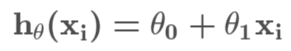

θ0,θ1  are parameter of hypothesis.This is equation for Simple / Univariate Linear regression.



In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
#library for data processing
import pandas as pd # data processing
import numpy as np # linear algebra
from pandas_profiling import ProfileReport

#library for data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
%matplotlib inline

#library for data modelling
from sklearn.datasets import load_boston
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#load boston dataset from sklearn.dataset
boston=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#open boston dataset and put on dataframe
from sklearn import datasets

fnames = [ i for i in dir(datasets) if 'load_' in i]
print(fnames)

fname = 'load_boston'
loader = getattr(datasets,fname)()
df = pd.DataFrame(loader['data'],columns= loader['feature_names'])
df['target'] = loader['target']

['load_boston', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#description of dataset
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#pandas profilling

#profile = ProfileReport(df, title="Pandas Profiling Report", html={'style':{'full_width':True}})
#profile.to_notebook_iframe()
#profile.to_file(output_file='boston_profiling.html')

### **Data Exploration**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

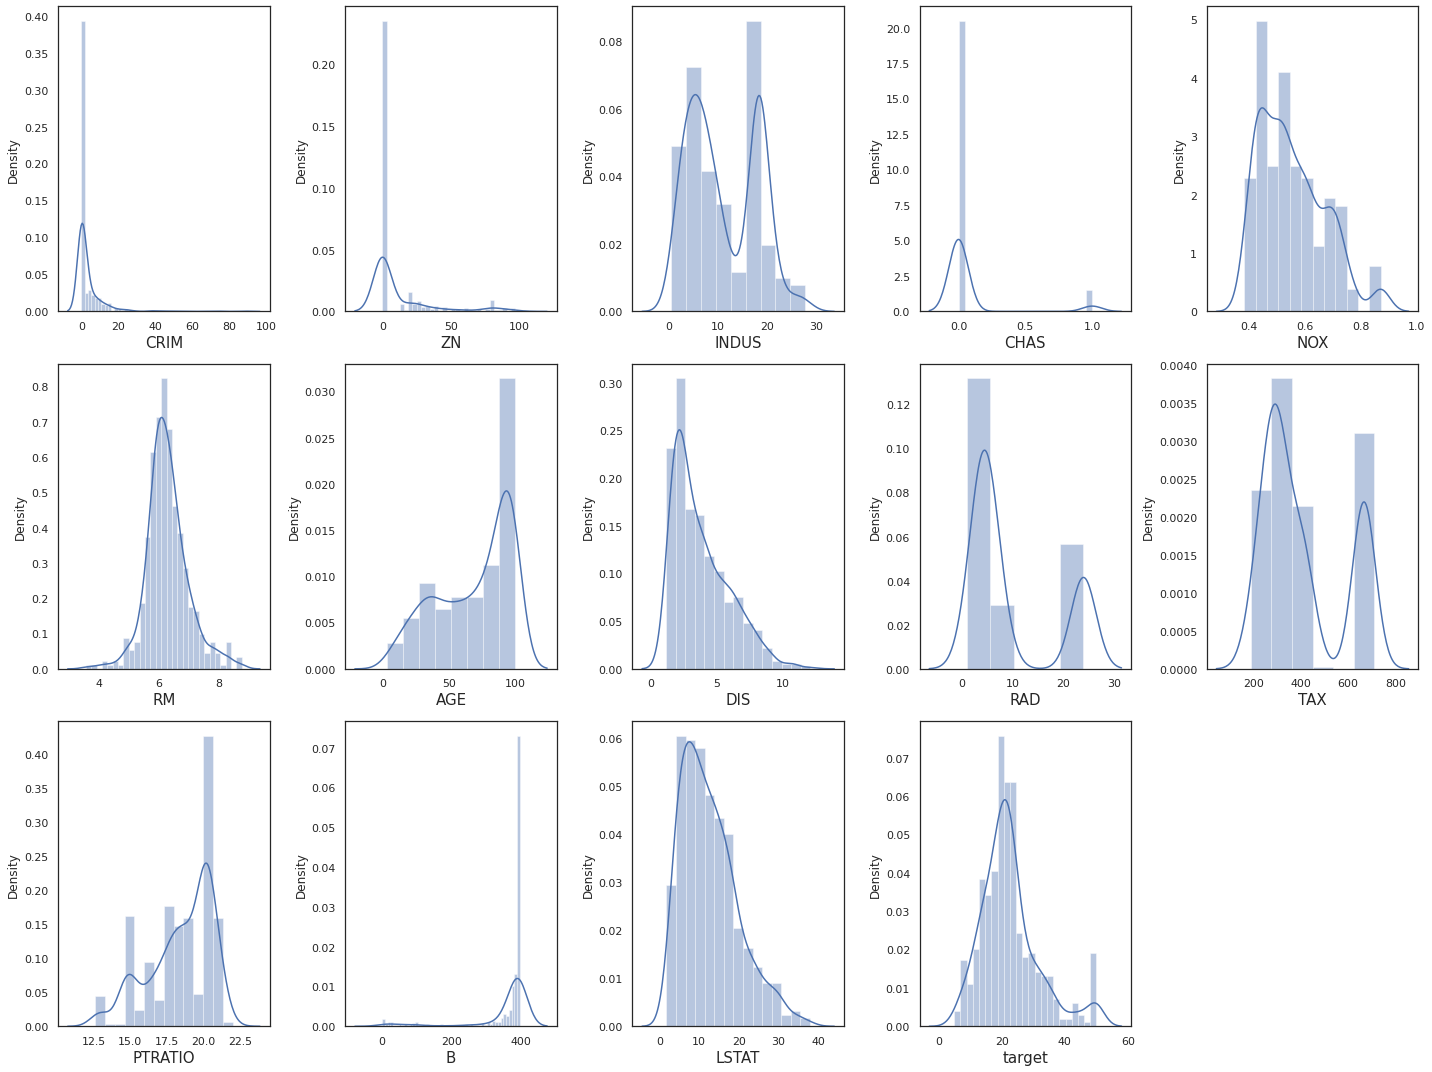

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


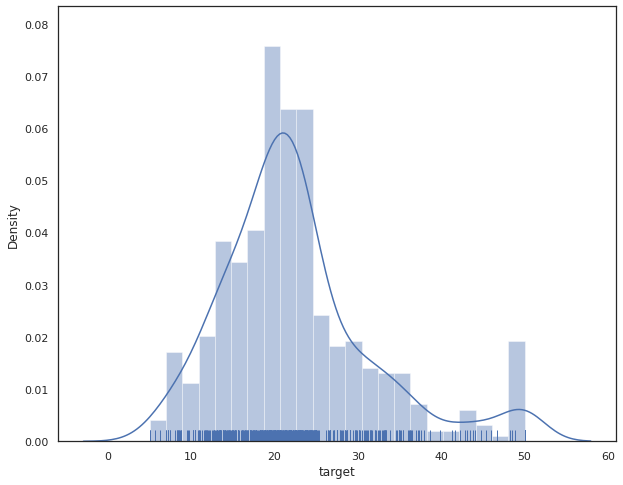

In [ ]:
plt.figure(figsize=(10, 8))
sns.distplot(df['target'], rug=True)
plt.show()

if we look at the distribution of our targets normally distributed, with a few outliers on the right

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


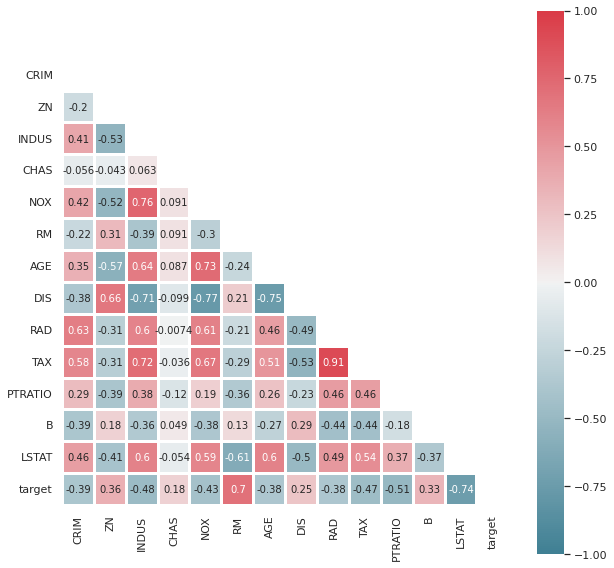

In [ ]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, square=True, mask=mask, cmap=cmap, linewidths=2)
plt.show()

In [ ]:
df['CHAS'].unique()

array([0., 1.])

In [ ]:

X=df.loc[:, df.columns != 'target']
y=df["target"]

In [ ]:
# Split training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)


In [ ]:
print("Data train shape : ",X_train.shape)
print("Data test shape  : ",X_test.shape)

Data train shape :  (404, 13)
Data test shape  :  (102, 13)


In [ ]:
print("Target train shape : ",y_train.shape)
print("Target test shape  : ",y_test.shape)

Target train shape :  (404,)
Target test shape  :  (102,)


jika kita lihat dari heatmap diatas ada beberapa korelasi yang kuat pada variabel, terutama pada variabel TAX(full-value property-tax rate per $10,000) dan RAD(index of accessibility to radial highways).

!!! hal ini harus diwaspadai karena pada model linear regression kita menggunakan assumsi tidak adanya multicollinearity.

### **Modelling with Feature Selection**

Because we have recognized from the last graph that the features are not linearly independent from each other, after every time when we fit a model, we will check the VIF (variance inflation factor) for multicollinearity, and take the feature with the largest off the model. And once every VIF value is lower than 5, we arrive at a model with low enough multicollinearity.

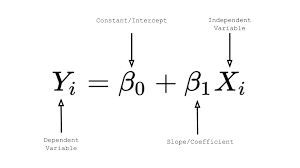

**Without constant B0**

**Model Building - Linear Regression**

**Feature Scaling**

In [ ]:
# Scaling the numerical variables 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [ ]:
# Scaling the numerical variables in the training set 
num_vars = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
379,0.242907,0.00,0.646628,0.0,0.588477,0.510059,1.000000,0.026773,1.000000,0.913958,0.808511,0.992032,0.553256
311,0.010664,0.00,0.346041,0.0,0.327160,0.490707,0.497872,0.157682,0.130435,0.221797,0.617021,1.000000,0.117274
157,0.016555,0.00,0.700880,0.0,0.452675,0.648017,0.972340,0.078042,0.173913,0.411090,0.223404,0.915603,0.078918
244,0.002717,0.22,0.197947,0.0,0.094650,0.389347,0.750000,0.712401,0.260870,0.271511,0.691489,0.938449,0.297185
56,0.000194,0.85,0.010264,0.0,0.051440,0.540717,0.315957,0.841066,0.043478,0.239006,0.500000,1.000000,0.111479


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Fitting the model on the tarining set and running RFE to select top 10 variables 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
# Printing out RFE output
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('CRIM', False, 2),
 ('ZN', False, 2),
 ('INDUS', False, 2),
 ('CHAS', False, 2),
 ('NOX', True, 1),
 ('RM', True, 1),
 ('AGE', False, 2),
 ('DIS', True, 1),
 ('RAD', True, 1),
 ('TAX', False, 2),
 ('PTRATIO', True, 1),
 ('B', False, 2),
 ('LSTAT', True, 1)]

In [ ]:
# Selecting chosen top ranked variables 
col = X_train.columns[rfe.support_]
col

Index(['NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

In [ ]:
# Updating the training set to only contain selected columns 
X_train_rfe = X_train[col]

In [ ]:
# adding constant column to X_train before fitting statsmodels Linear model
X_train_rfe = sm.add_constant(X_train_rfe)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Fitting a linear model to the updating training set
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
# Printing out summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     155.4
Date:                Mon, 21 Mar 2022   Prob (F-statistic):          6.60e-101
Time:                        01:46:37   Log-Likelihood:                -1217.6
No. Observations:                 404   AIC:                             2449.
Df Residuals:                     397   BIC:                             2477.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.8424      2.271     13.584      0.000      26.379      35.306
NOX           -9.8026      1.941     -5.050      0.000     -13.619      -5.986
RM            20.3638      2.467      8.255      0.000      15.514      25.213
DIS          -11.2218      1.840     -6.100      0.000     -14.838      -7.605
RAD            1.6013      0.960      1.669      0.096      -0.285       3.488
PTRATIO      -10.7250      1.341     -7.995      0.000     -13.362      -8.088
LSTAT        -20.6319      1.923    -10.727      0.000     -24.413     -16.851
==============================================================================
Omnibus:                      130.390   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              479.777
Skew:                           1.414   Prob(JB):                    6.57e-105
Kurtosis:                       7.528   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Checking VIF to detect Multicollinearity within independent variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.28
1,NOX,3.50
3,DIS,2.52
6,LSTAT,2.43
4,RAD,2.11
2,RM,1.81
5,PTRATIO,1.48


In [ ]:
# Removing Columns with P-value > 0.05 and Removing Spring due to high VIF value (Multicollinear)
X_train_rfe_2 = X_train_rfe

In [ ]:
# Training a new model
lm_new = sm.OLS(y_train,X_train_rfe_2).fit()
lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     155.4
Date:                Mon, 21 Mar 2022   Prob (F-statistic):          6.60e-101
Time:                        01:46:37   Log-Likelihood:                -1217.6
No. Observations:                 404   AIC:                             2449.
Df Residuals:                     397   BIC:                             2477.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.8424      2.271     13.584      0.000      26.379      35.306
NOX           -9.8026      1.941     -5.050      0.000     -13.619      -5.986
RM            20.3638      2.467      8.255      0.000      15.514      25.213
DIS          -11.2218      1.840     -6.100      0.000     -14.838      -7.605
RAD            1.6013      0.960      1.669      0.096      -0.285       3.488
PTRATIO      -10.7250      1.341     -7.995      0.000     -13.362      -8.088
LSTAT        -20.6319      1.923    -10.727      0.000     -24.413     -16.851
==============================================================================
Omnibus:                      130.390   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              479.777
Skew:                           1.414   Prob(JB):                    6.57e-105
Kurtosis:                       7.528   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Checking VIF to detect Multicollinearity within independent variables 
vif = pd.DataFrame()
X = X_train_rfe_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.28
1,NOX,3.50
3,DIS,2.52
6,LSTAT,2.43
4,RAD,2.11
2,RM,1.81
5,PTRATIO,1.48


In [ ]:
# Finding the top 3 features contributing significantly towards explaining 
# the demand of the shared bikes
lm_new.params

const      30.842439
NOX        -9.802575
RM         20.363800
DIS       -11.221829
RAD         1.601283
PTRATIO   -10.725024
LSTAT     -20.631942
dtype: float64

**Residual Analysis**

In [ ]:
# Starting residual analysis 
y_train_pred = lm_new.predict(X_train_rfe_2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


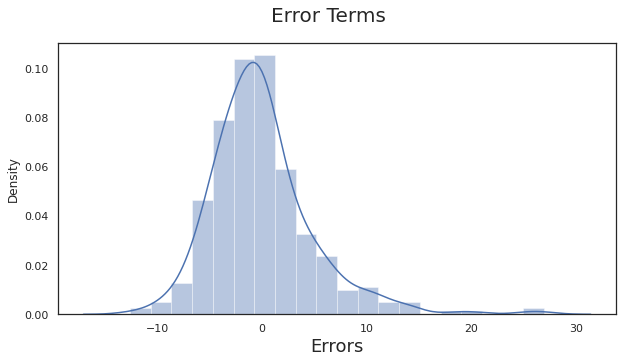

In [ ]:
# Plotting the residuals 
fig = plt.figure(figsize=[10,5])
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18); 

*   The error terms are centrally distributed
*   The average of error terms is zero



In [ ]:
# Transforming the test set
num_vars = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
198,0.000427,0.8,0.038856,0.0,0.039095,0.711439,0.343617,0.644984,0.043478,0.269598,0.000000,0.988149,0.134934
229,0.005922,0.0,0.210411,0.0,0.244856,0.573098,0.163830,0.234377,0.304348,0.227533,0.510638,0.958243,0.056015
502,0.000530,0.0,0.420455,0.0,0.386831,0.490324,0.752128,0.120858,0.000000,0.162524,0.893617,1.000000,0.202815
31,0.018339,0.0,0.281525,0.0,0.314815,0.481127,1.000000,0.317868,0.130435,0.227533,0.893617,0.949140,0.312086
315,0.003363,0.0,0.346041,0.0,0.327160,0.410807,0.762766,0.293862,0.130435,0.221797,0.617021,0.998790,0.269592


In [ ]:
#Making predictions on test set, first adding constant
X_test_new = sm.add_constant(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Sorting the columns 
X_test_new = X_test_new[X_train_rfe_2.columns]

In [ ]:
# Making Predictions on new test set using the model lm_new_2 (latest model) 
y_test_pred = lm_new.predict(X_test_new)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7311146222724807

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_test_pred)
mse

25.972802925960856

In [ ]:
rmse=np.sqrt(mse)
rmse

5.096351923284033


*   Linear model assumptions - Homodescascity, Multicollinearity & Error terms distribution were verified
*   The most significant predictor variables are Temp(temperature), Year and Snowy (weather)
*   72% of the demand is explained by these three most significant variables